In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
#reading the data
data=pd.read_csv("housing.csv")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [14]:
#describig the data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
np
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
#checking for null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
#finding mean of the column with missing values
np.mean(data['total_bedrooms'])

537.8705525375618

In [18]:
#substuiting null values with mean
data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

In [19]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [20]:
#describing the data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
#type of the data present in the dataset
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

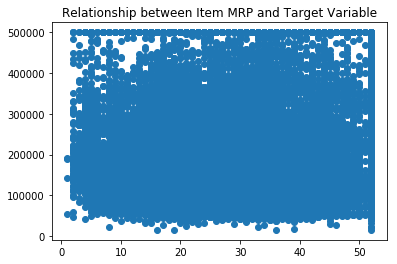

In [22]:
plt.scatter(data.housing_median_age,data.median_house_value)
plt.title("Relationship between Item MRP and Target Variable")
plt.show()

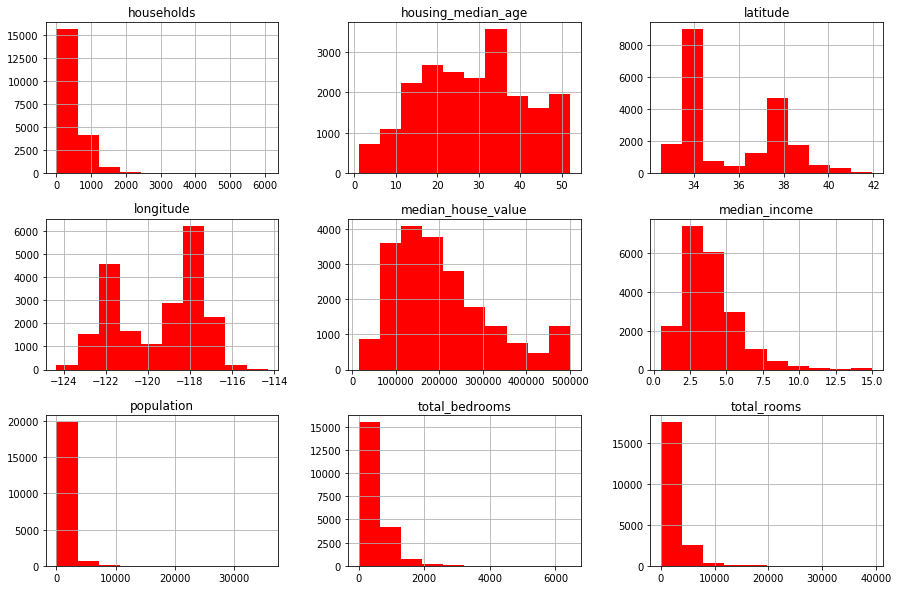

In [23]:
#histograms representing the features
data.hist(figsize=(15,10), color = 'red')
plt.show()

In [24]:
#finding the unique values of the feature
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype=object)

In [25]:
#converting string values to numerical values using lable encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ocean_proximity']=le.fit_transform(data['ocean_proximity'])
data['ocean_proximity'].head(5)

0    3
1    3
2    3
3    3
4    3
Name: ocean_proximity, dtype: int64

In [26]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [27]:
#standardization of the data
data['housing_median_age'] = data.housing_median_age.astype(float)
data['total_rooms'] = data.total_rooms.astype(float)
data['population'] = data.population.astype(float)
data['households'] = data.households.astype(float)
data['median_house_value'] = data.median_house_value.astype(float)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [28]:
#spliting the data and identifiying dependent and indipendent variables
x=data.drop('median_house_value',axis=1)
y=data['median_house_value']

In [29]:
#spliting the data into test and train 
from sklearn import model_selection
x_test,x_train,y_test,y_train=model_selection.train_test_split(x,y,test_size=0.2,random_state=102)

In [30]:
#shapes of the data after spliting
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20640, 9)
(20640,)
(4128, 9)
(4128,)
(16512, 9)
(16512,)


In [31]:
#appliying linear regression
#finding rmse values 
#finding accuracy score
from  sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
y_pred=le.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
accuracy=le.score(x_test,y_test)
print(accuracy*100,'%')

69773.4853585
63.5247763393 %


In [32]:
#appliying decision tree with single paarameter
#finding rmse values 
#finding accuracy score
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(max_depth=10)
dtree_reg.fit(x_train, y_train)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
pred = dtree_reg.predict(x_test)
accuracy=dtree_reg.score(x_test,y_test)
print(accuracy*100,'%')

69773.4853585
60.0933300041 %


In [33]:
#appliying decision tree with multiple parameters
#finding rmse values 
#finding accuracy score
dtree_reg = DecisionTreeRegressor(max_depth=15,max_features = 'sqrt',min_samples_leaf = 3,min_samples_split = 4,random_state= 42)
dtree_reg.fit(x_train, y_train)
print(np.sqrt(mean_squared_error(y_test, pred)))
pred = dtree_reg.predict(x_test)
accuracy=dtree_reg.score(x_test,y_test)
print(accuracy*100,'%')

72981.7344925
56.2357021092 %


In [34]:
#appliying random forest
#finding rmse values 
#finding accuracy score
from sklearn.ensemble import RandomForestRegressor
rt=RandomForestRegressor(max_depth=30,min_samples_leaf=20,max_features='sqrt',n_estimators=1000)
rt.fit(x_train,y_train)
predt=rt.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,predt)))
accuracy=rt.score(x_test,y_test)
print(accuracy*100,'%')

60715.5495459
72.3804251694 %


In [35]:
#spliting the data for test and train 
#appliying linear regression with one indipendent variable
#finding rmse values 
#finding accuracy score
c=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
a=x.drop(c,axis=1)
b=data["median_house_value"]
x_train1,x_test1,y_train1,y_test1 =model_selection.train_test_split(a,b,test_size=0.2,random_state=45)
print("x_train1 shape :",x_train1.shape)
print("x_test1 shape :",x_test1.shape)
print("y_train1 shape :",y_train1.shape)
print("y_test1 shape :",y_test1.shape)

x_train1 shape : (16512, 1)
x_test1 shape : (4128, 1)
y_train1 shape : (16512,)
y_test1 shape : (4128,)


In [36]:
le1 = LinearRegression()
le1.fit(x_train1, y_train1)
pred2=le1.predict(x_test1)
accuracy=le1.score(x_test1,y_test1)
print(accuracy*100,'%')
print(np.sqrt(mean_squared_error(y_test1, pred2)))

48.5836249305 %
82598.9699864


In [37]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(x_train1,y_train1,color="red")
plt.plot(x_train1,le1.predict(x_train1),color="blue")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

In [38]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test1,pred2,marker="*",s=100)
plt.scatter(y_train1,le1.predict(x_train1),marker="s",s=90,alpha=0.9)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

Text(0,0.5,' Predicted median_house_value')